Let's begin our project by importing the required libraries

In [181]:
from pyforest import *         #by importing pyforest we do not need to import pandas, numpy libraries.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

Now, we will add the csv file.

In [182]:
tweet = pd.read_csv('Information.csv', encoding='latin1')

<IPython.core.display.Javascript object>

In [183]:
tweet.head()  #gives the first five rows of the csv file

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12-05-2013 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10-01-2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06-11-2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In this particular dataset, 'Gender' is our target variable and others are independent features.

In [184]:
tweet.describe()   #shows the statistical analysis of our data.

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.590000e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,1.536038e+05
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.590000e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.590000e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.590000e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.590000e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.590000e+17


In [185]:
tweet.info()   #gives us the info of datatypes, non-null numbers and the usage of memory.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20050 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [186]:
tweet.isnull().sum()   #shows that how many null values are there in each column.

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at            0
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [187]:
tweet.drop_duplicates()   #helps us to drop duplicates

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12-05-2013 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10-01-2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06-11-2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,10/27/15 2:50,female,1.0000,yes,1.0,08-05-2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,10/27/15 2:50,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,10/27/15 2:50,male,1.0000,yes,1.0,09-03-2012 01:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,10/27/15 2:50,female,0.8489,yes,1.0,11-06-2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.590000e+17,Texas Hill Country,NaN


By visualizing the dataset in excel, we can drop some columns which will not be required in our project.

In [188]:
tweet.drop(columns=['profile_yn','profileimage','sidebar_color','tweet_coord','tweet_id','tweet_location','user_timezone','gender_gold','link_color','profile_yn_gold','name','fav_number'], inplace=True)

In [189]:
from sklearn.preprocessing import LabelEncoder  # helps to convert categorical into numerical.
le = LabelEncoder()
tweet['_golden'] = le.fit_transform(tweet['_golden'])
tweet['_unit_state'] = le.fit_transform(tweet['_unit_state'])

In [190]:
tweet.gender.value_counts()  #gives the total number of female,male values.

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [193]:
tweet.dropna(axis=0, inplace=True)

In [194]:
tweet.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn:confidence    0
created                  0
description              0
retweet_count            0
text                     0
tweet_count              0
tweet_created            0
dtype: int64

In [155]:
tweet.retweet_count.max()        #gives us the retweet that were done by a particular gender/person

330

Maximum Typos

In [156]:
tweet.loc[tweet.retweet_count == 330]  #gives the data of which gender had maximum retweets.

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,retweet_count,text,tweet_count,tweet_created
1209,815720445,0,0,3,10/27/15 0:53,brand,0.6623,1.0,9/26/11 8:50,Our new single 'Love Me Like You' is OUT NOW o...,330,Love this by the amazingly talented @elenamart...,23060,10/26/15 12:40


In [157]:
tweet.gender[tweet.gender == 'male'] = 1
tweet.gender[tweet.gender == 'female'] = 2
tweet.gender[tweet.gender == 'unknown'] = 0
tweet.gender[tweet.gender == 'brand'] = 3

In [160]:
tweet.head()   # Converted the gender categorical column into a integer.

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,retweet_count,text,tweet_count,tweet_created
0,815719226,0,0,3,10/26/15 23:24,1,1.0000,1.0,12-05-2013 01:48,i sing my own rhythm.,0,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40
1,815719227,0,0,3,10/26/15 23:30,1,1.0000,1.0,10-01-2012 13:51,I'm the author of novels filled with family dr...,0,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40
2,815719228,0,0,3,10/26/15 23:33,1,0.6625,1.0,11/28/14 11:30,louis whining and squealing and all,1,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40
3,815719229,0,0,3,10/26/15 23:10,1,1.0000,1.0,06-11-2009 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40
4,815719230,0,0,3,10/27/15 1:15,2,1.0000,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40


In [161]:
data = tweet.replace({
    'description': '[A-Za-z]'
},    '', regex=True)
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,description,retweet_count,text,tweet_count,tweet_created
0,815719226,0,0,3,10/26/15 23:24,1,1.0000,1.0,12-05-2013 01:48,.,0,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40
1,815719227,0,0,3,10/26/15 23:30,1,1.0000,1.0,10-01-2012 13:51,' .,0,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40
2,815719228,0,0,3,10/26/15 23:33,1,0.6625,1.0,11/28/14 11:30,,1,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40
3,815719229,0,0,3,10/26/15 23:10,1,1.0000,1.0,06-11-2009 22:39,". 49, , , , !, , , . , . , , . .",0,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40
4,815719230,0,0,3,10/27/15 1:15,2,1.0000,1.0,4/16/14 13:23,/ :),0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,1,1,259,10/27/15 2:50,2,1.0000,1.0,08-05-2015 21:16,(),0,"@lookupondeath ...Fine, and I'll drink tea too...",783,10/26/15 13:20
20046,815757681,1,1,248,10/27/15 2:50,1,1.0000,1.0,8/15/12 21:17,", ' . 9/1/15 # # #20 # #",0,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40
20047,815757830,1,1,264,10/27/15 2:50,1,1.0000,1.0,09-03-2012 01:17,# .. !!! ... ..#,0,You can miss people and still never want to se...,26419,10/26/15 13:20
20048,815757921,1,1,250,10/27/15 2:50,2,0.8489,1.0,11-06-2012 23:46,-; . . . @ @.,0,@bitemyapp i had noticed your tendency to pee ...,56073,10/26/15 12:40


In [162]:
tweet.description.value_counts()

You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV                   33
Subscribe to her Inspirational channel here http://t.co/P1y6f2Rzoj ~~~~~~~~~~~~~~\nFor promoting on this page email, business_inquiry@outlook.com                          32
secret little rendezvous                                                                                                                                                   27
The Map Game is a free geography quiz based on Google Maps. No flash, no need to register, just start finding places on a blind map!                                       24
'Cos even an old girl's best friend is still her MUM!                                                                                                                      18
                                                                                                                                  

In [163]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nlp
from nltk.corpus import stopwords
import re
import nltk
def normalize_text(s):
    s = str(s)
    s = s.lower()
    s = s.replace("'s",' is')
    s = s.replace("'re",' are')
    s = s.replace("'ve",' have')
    s = re.sub('\s\W',' ',s) #whitespace characters
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("ù","")
    s = s.replace("ù", "")
    s = s.replace("û", "")
    s = s.replace("âù", "")
    s = s.replace("ü", "")
    s = s.replace("å", "")
    s = s.replace("â", "")
    s = s.replace("ä", "")
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    
    return s

tweet['text_norm'] = [normalize_text(s) for s in tweet['text']]
tweet['description_norm'] = [normalize_text(s) for s in tweet['description']]

In [164]:
tweet.drop(columns=['text','description'], inplace=True)

In [165]:
tweet.tweet_count.max()

2680199

In [166]:
tweet.tweet_count.min()

1

In [167]:
tweet.loc[tweet.tweet_count == 2680199]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,retweet_count,tweet_count,tweet_created,text_norm,description_norm
15940,815735441,0,0,3,10/27/15 0:22,1,1.0,1.0,2/21/12 18:17,0,2680199,10/26/15 13:19,one state ªs struggle to make ends meet why il...,nfira as ultimas notìcias do que estìá antecen...


In [168]:
tweet.loc[tweet.tweet_count == 1]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn:confidence,created,retweet_count,tweet_count,tweet_created,text_norm,description_norm
7334,815726652,0,0,3,10/27/15 0:15,3,1.0000,1.0,11-10-2010 01:13,0,1,10/26/15 12:40,khosinkosi hi is this the email address where...,official acunt of lemon ncepts
10650,815730017,0,0,3,10/27/15 1:14,1,0.6723,1.0,10/21/15 19:36,0,1,10/26/15 13:20,give a man a fish and feed him for a day don t...,ì ãò ó ë öë ó ìé ó ï ãòìì ë ö ó ö ìë ó ë...
11520,815730910,0,0,3,10/26/15 22:09,3,1.0000,1.0,10/26/15 13:04,0,1,10/26/15 13:20,welme to ruthin cinema our first ever screenin...,showing next inside out nd december pm ruthin ...
12728,815732152,0,0,3,10/27/15 0:18,3,1.0000,1.0,10/24/15 6:01,0,1,10/26/15 13:20,we are so excited to start working with ukmarr...,we are a new student society at new bucks univ...
15280,815734762,0,0,3,10/27/15 1:19,2,0.6742,1.0,10/25/15 9:05,1,1,10/26/15 13:19,the world is such a big place and i just want ...,follow my instagram relentlessmind
16763,815736280,0,0,3,10/26/15 23:50,1,1.0000,1.0,6/13/14 6:46,0,1,10/26/15 13:19,mysterious space junk is hurtling towards eart...,phd student bioinformatics
17368,815736898,0,0,3,10/27/15 1:55,0,0.6659,1.0,10/25/15 23:49,0,1,10/26/15 13:19,to new beginnings and building worlds you drea...,technosparkling fox girl searching for a web r...


In [169]:
tweet.rename(columns={'gender:confidence':'confidence'}, inplace=True)

In [170]:
tweet.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,confidence,profile_yn:confidence,created,retweet_count,tweet_count,tweet_created,text_norm,description_norm
0,815719226,0,0,3,10/26/15 23:24,1,1.0000,1.0,12-05-2013 01:48,0,110964,10/26/15 12:40,robbie e responds to critics after win against...,i sing my own rhythm
1,815719227,0,0,3,10/26/15 23:30,1,1.0000,1.0,10-01-2012 13:51,0,7471,10/26/15 12:40,ïit felt like they were my friends and i was ...,i m the author of novels filled with family dr...
2,815719228,0,0,3,10/26/15 23:33,1,0.6625,1.0,11/28/14 11:30,1,5617,10/26/15 12:40,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,0,0,3,10/26/15 23:10,1,1.0000,1.0,06-11-2009 22:39,0,1693,10/26/15 12:40,hi jordanspieth looking at the url do you use ...,mobile guy ers shazam google kleiner perkins y...
4,815719230,0,0,3,10/27/15 1:15,2,1.0000,1.0,4/16/14 13:23,0,31462,10/26/15 12:40,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...


In [171]:
tweet.loc[tweet.confidence == 1]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,confidence,profile_yn:confidence,created,retweet_count,tweet_count,tweet_created,text_norm,description_norm
0,815719226,0,0,3,10/26/15 23:24,1,1.0,1.0,12-05-2013 01:48,0,110964,10/26/15 12:40,robbie e responds to critics after win against...,i sing my own rhythm
1,815719227,0,0,3,10/26/15 23:30,1,1.0,1.0,10-01-2012 13:51,0,7471,10/26/15 12:40,ïit felt like they were my friends and i was ...,i m the author of novels filled with family dr...
3,815719229,0,0,3,10/26/15 23:10,1,1.0,1.0,06-11-2009 22:39,0,1693,10/26/15 12:40,hi jordanspieth looking at the url do you use ...,mobile guy ers shazam google kleiner perkins y...
4,815719230,0,0,3,10/27/15 1:15,2,1.0,1.0,4/16/14 13:23,0,31462,10/26/15 12:40,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...
5,815719231,0,0,3,10/27/15 1:47,2,1.0,1.0,03-11-2010 18:14,0,20036,10/26/15 12:40,ive seen people on the train with lamps chairs...,you don t know me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,815756767,1,1,227,10/27/15 2:50,2,1.0,1.0,06-11-2014 01:55,0,6669,10/26/15 13:19,need a ride home from practice ô ô ôand its r...,i love me myself i
20045,815757572,1,1,259,10/27/15 2:50,2,1.0,1.0,08-05-2015 21:16,0,783,10/26/15 13:20,lookupondeath fine and i ll drink tea too i l...,rp
20046,815757681,1,1,248,10/27/15 2:50,1,1.0,1.0,8/15/12 21:17,0,13523,10/26/15 12:40,greg hardy you a good player and all but don t...,whatever you like it is not a problem at all c...
20047,815757830,1,1,264,10/27/15 2:50,1,1.0,1.0,09-03-2012 01:17,0,26419,10/26/15 13:20,you can miss people and still never want to se...,teambarcelona you look lost so you should fol...


In [172]:
confidence = tweet[tweet['confidence'] == 1]
confidence.shape

(11845, 14)

Let's see which are the most common words used by males and females.

In [173]:
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer
all_words = []
for line in list(tweet['text_norm']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(20)    

[('the', 12659),
 ('and', 10793),
 ('t', 8821),
 ('i', 6349),
 ('to', 5318),
 ('is', 4731),
 ('a', 4190),
 ('you', 3844),
 ('of', 3666),
 ('in', 3064),
 ('for', 2832),
 ('it', 2723),
 ('on', 2101),
 ('my', 1974),
 ('me', 1856),
 ('that', 1760),
 ('are', 1578),
 ('with', 1485),
 ('have', 1479),
 ('this', 1273)]

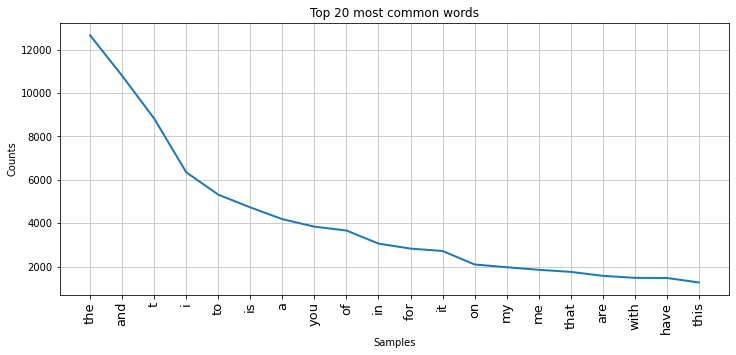

In [174]:
plt.figure(figsize=(12,5))
plt.title('Top 20 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(20,cumulative=False)

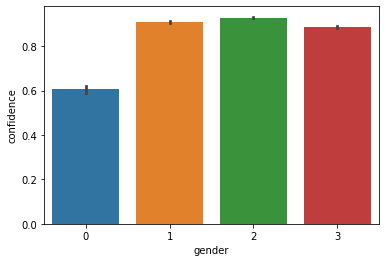

In [175]:
sns.barplot(x='gender', y='confidence', data=tweet)

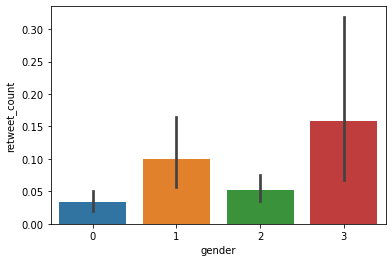

In [176]:
sns.barplot(x='gender', y='retweet_count', data=tweet)

As we are done with the Data extraction, pre-processing and EDA now it's time to train the models.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score, accuracy_score,recall_score,precision_score,roc_auc_score

In [178]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(confidence['text_norm'])

encoder = LabelEncoder()
y = encoder.fit_transform(confidence['gender'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

sc = StandardScaler(with_mean=False)
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9476, 29737)
(9476,)
(2369, 29737)
(2369,)


In [179]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer 
from sklearn.multiclass import OneVsRestClassifier
nb = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)
nb.fit(x_train, y_train)
print('Training Set',nb.score(x_train, y_train)*100)
print('Test Set',nb.score(x_test, y_test)*100)

Training Set 85.65850569860702
Test Set 53.14478682988602


In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(x_train, y_train)
print('Training Set',model.score(x_train, y_train)*100)
scores=cross_val_score(model, x, y, cv=5)
scores
print('Test Set',model.score(x_test, y_test)*100)

Training Set 95.67327986492191
Test Set 51.371886872097924


In [140]:
from sklearn import svm
model = svm.SVC(decision_function_shape='ovo')
scores=cross_val_score(model, x, y, cv=5)
scores
model.fit(x_train, y_train)
print('Training Set',model.score(x_train, y_train)*100)
print('Test Set',model.score(x_test, y_test)*100)

Training Set 89.80582524271846
Test Set 52.638243984803715


In [48]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,)
model.fit(x_train, y_train)
print('Training Set',model.score(x_train, y_train))
print('Test Set',model.score(x_test, y_test))

Training Set 0.997889404812157
Test Set 0.5141409877585479


The best algorithm for my project has been MultinomialNB as the test accuracy is the highest for it else neural network (MLP) has the best accuracy of 100% on the training set. With this I conclude my work.